# chapter 6 : 결정 트리

- SVM 처럼 분류와 회귀 작업 그리고 다중출력 작업도 가능한 다재다능한 알고리즘
- 매우 복잡한 데이터셋도 학습할 수 있는 알고리즘
- 랜덤포레스트(7장)의 기본 구성 요소

### Set up

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

### 6.1 결정 트리 학습과 시각화

- sklearn.tree import DecisionTreeClassifier 를 이용하여 학습

In [2]:
# 붓꽃 데이터셋에 DecisionTreeClassifier를 훈련

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [3]:
print(iris)
print(X)
print(y)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

export_graphviz() 함수를 사용해 그래프 정의를 
iris_tree.dot 파일로 출력하여 훈련된 결정 트리를 시각화


### 6.2 모델 예측

- 새로 발견한 붓꽃의 품종을 분류하려고 한다
- 결정트리의 알고리즘은 먼저 두개의 조건중의 하나의 조건으로(예를들면 꽃잎의 길이) 분류를 시행하고 분류된 상황에서 리프 노드라면 클래스가 추정되고 리프 노드가 아니라면 거기서 남은 조건으로 분류한다(예를들면 꽃잎의 길이가 몇이상중의 꽃잎의 넓이가 몇 이상인지 이하인지로)

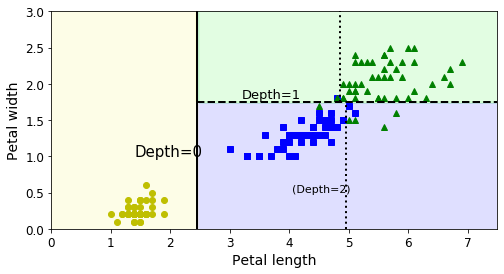

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)


plt.show()

- 모델해석 : 화이트박스와 블랙박스
- 직관적이고 이해가 쉬움
- 이런모델을 화이트박스라고함
- 블랙박스는 뒤에배울 랜덤 포레스트나 신경망
- 결정 트리는 필요하다면 수동으로 직접 따라 해볼 수도 있는 간단하고 명확한 분류 방법을 사용

### 6.3 클래스 확률 추정

In [5]:
tree_clf.predict_proba([[6, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [6]:
tree_clf.predict([[6, 1.5]])

array([1])

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict_proba([[1, 1.5]])

array([[1., 0., 0.]])

In [9]:
tree_clf.predict_proba([[5,1.9]])

array([[0.        , 0.02173913, 0.97826087]])

In [10]:
tree_clf.predict([[5, 1.5]])

array([1])

In [11]:
tree_clf.predict([[7, 2.5]])

array([2])

In [12]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

### 6.4 CART 훈련 알고리즘

- 사이킷런은 결정 트리를 훈련시키기 위해(즉, 트리를 성장시키기 위해) CART(Classification And Regression Tree)를 사용한다
- 훈련세트 하나의 특성 k의 임계값 k_t를 사용해 두개의 서브셋으로 나눈다
- 그 다음엔 서브셋의 서브셋을 나누고 반복한다
- 최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈춘다

In [13]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [14]:
print(X)
print(y)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [15]:
not_widest_versicolor[70]

False

In [16]:
X[70]

array([4.8, 1.8])

In [17]:
y[70]

1

In [18]:
print(len(X))
print(len(y))
print(len(X_tweaked))
print(len(y_tweaked))
print(X_tweaked)
print(y_tweaked)


150
150
149
149
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4

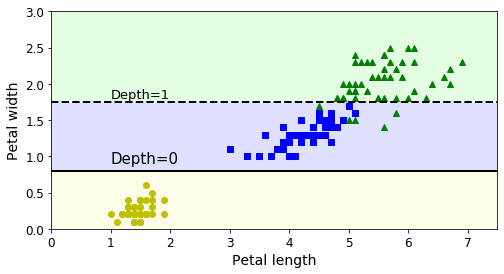

In [19]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)


plt.show()

### 6.6 지니 불순도 또는 엔트로피?

- 기본적으로는 지니 불순도가 사용되지만
- criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있다
- 엔트로피는 분자의 무질서함을 측정하는것
- 분자가 안정되고 질서 정연하면 엔트로피가 0에 가깝다
- 어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0이다
- 지니 불순도와 엔트로피는 사실 차이가 없다
- 지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋다

### 6.7 규제 매개변수

- 결정 트리는 훈련 데이터에 대한 제약사항이 거의 없다
- 반대로 선형 모델같은경우는 데이터가 꼭 선형일거라 가정한다
- 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합 되기 쉽다
- 결정 트리는 모델 파라미터가 전혀 없는 것이 아니다
- 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 비파라미터 모델이라고 한다(nonparametric model)
- 반대로 선형 모델 같은 파라미터 모델은 미리 정의된 모델 파라미터 수를 가지고 자유도가 제한되고 과대적합될 위험이 줄어들지만, 과소적합의 위험이 있다
- 비파라미터의 모델인 경우 과대적합을 피하기 위해 학습할 때 결정트리의 자유도를 제한할 필요가 있다 이를 규제라고 한다
- 최소한 결정 트리의 최대 깊이는 제어할 수 있다
- 사이킷런에서는 max_depth 매개변수로 이를 조절한다
- DecisionTreeClassifier에는 비슷하게 결정 트리의 형태를 제한하는 다른 매개변수가 몇개 있다
- min_samples_split(분할되기 위해 노드가 가져야 하는 최소 샘플 수)
- min_weight_fraction_leaf(min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율)
- max_leaf_nodes(리프 노드의 최대 수)
- max_features(각 노드에서 분할에 사용할 특성의 최대 수)
- 즉, min으로 시작하는 매개변수를 증가시키거나 max로 시작하는 매개변수를 감소시키면 모델에 규제가 커진다

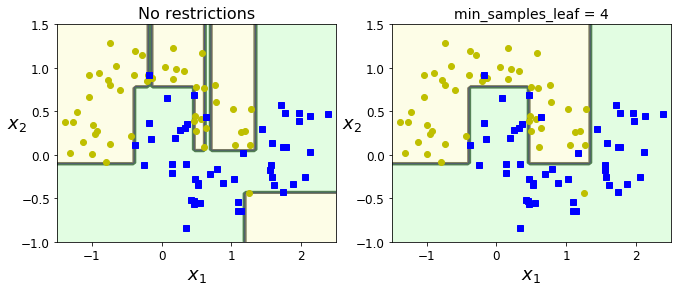

In [20]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

- 왼쪽 그림은 규제가 아에 없다
- 오른쪽 그림은 min_samples_leaf=4로 지정하여 훈련했다
- 왼쪽 그림은 과대 적합되었고 오른쪽 모델은 일반화 성능이 더 좋을 것 같아 보인다

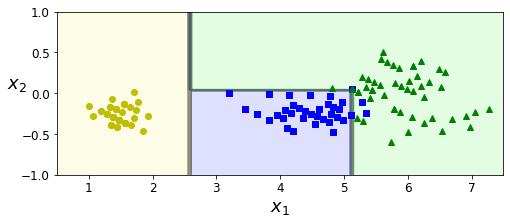

In [21]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

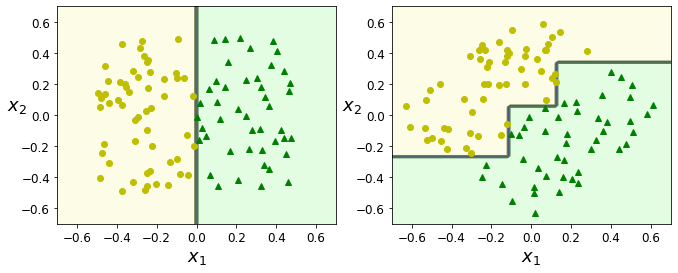

In [22]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

In [23]:
print(Xs)
print(len((Xs)))
print(ys)
print(angle)

[[ 0.39286015 -0.16802019]
 [ 0.32122912 -0.45830337]
 [-0.39234332  0.09505206]
 [ 0.02981736 -0.08119257]
 [-0.16459215  0.12251943]
 [-0.06185857  0.23588211]
 [ 0.01803641  0.0788586 ]
 [ 0.1453551   0.49022427]
 [ 0.3198582  -0.08679907]
 [ 0.37626766  0.32375943]
 [-0.44552549  0.21863724]
 [ 0.30217056  0.23640664]
 [ 0.20913175  0.04093685]
 [-0.37517583  0.4576473 ]
 [-0.0967437  -0.28304884]
 [ 0.21727585  0.49420744]
 [-0.24438594  0.17130943]
 [ 0.09900591  0.21733215]
 [ 0.43734953 -0.14819023]
 [-0.2463659  -0.09752749]
 [ 0.24651072  0.22407057]
 [-0.0938922   0.48937985]
 [-0.04950072 -0.12619157]
 [ 0.20962861 -0.41754145]
 [-0.10162708  0.27088097]
 [ 0.26475098 -0.21614062]
 [-0.31045781 -0.02874904]
 [-0.16519396  0.23473504]
 [-0.31089288 -0.16889593]
 [ 0.34422842  0.11502403]
 [ 0.38526408  0.47655302]
 [ 0.33690859 -0.31917537]
 [ 0.11841051 -0.02389113]
 [-0.09584335  0.24188369]
 [ 0.32593329  0.18322983]
 [-0.36072839  0.20282506]
 [-0.44116271 -0.30733453]
 

### 6.8 회귀

- 결정 트리는 회귀 문제에도 사용가능
- 사이킷런의 DecisionTreeRegressor을 사용
- 분류 트리와 주요한 차이는 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측한다는 점이다

In [24]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [26]:
print(X)
print(max(X))

[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]
 [0.15599452]
 [0.05808361]
 [0.86617615]
 [0.60111501]
 [0.70807258]
 [0.02058449]
 [0.96990985]
 [0.83244264]
 [0.21233911]
 [0.18182497]
 [0.18340451]
 [0.30424224]
 [0.52475643]
 [0.43194502]
 [0.29122914]
 [0.61185289]
 [0.13949386]
 [0.29214465]
 [0.36636184]
 [0.45606998]
 [0.78517596]
 [0.19967378]
 [0.51423444]
 [0.59241457]
 [0.04645041]
 [0.60754485]
 [0.17052412]
 [0.06505159]
 [0.94888554]
 [0.96563203]
 [0.80839735]
 [0.30461377]
 [0.09767211]
 [0.68423303]
 [0.44015249]
 [0.12203823]
 [0.49517691]
 [0.03438852]
 [0.9093204 ]
 [0.25877998]
 [0.66252228]
 [0.31171108]
 [0.52006802]
 [0.54671028]
 [0.18485446]
 [0.96958463]
 [0.77513282]
 [0.93949894]
 [0.89482735]
 [0.59789998]
 [0.92187424]
 [0.0884925 ]
 [0.19598286]
 [0.04522729]
 [0.32533033]
 [0.38867729]
 [0.27134903]
 [0.82873751]
 [0.35675333]
 [0.28093451]
 [0.54269608]
 [0.14092422]
 [0.80219698]
 [0.07455064]
 [0.98688694]
 [0.77224477]
 [0.19

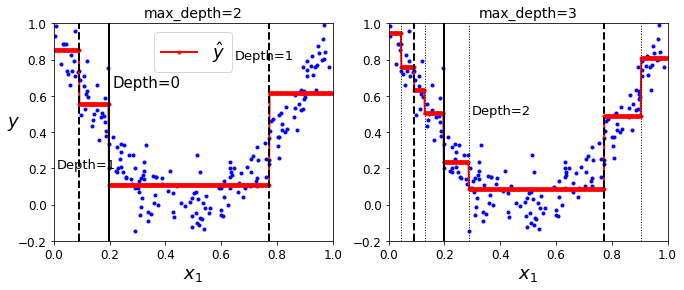

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

- 왼쪽은 이 모델의 예측
- 오른쪽은 max_depth=3으로 늘려봄
- 각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균이 된다
- 알고리즘은 예측값과 가능한 한 많은 샘플이 가까이 있도록 영역을 분할한다

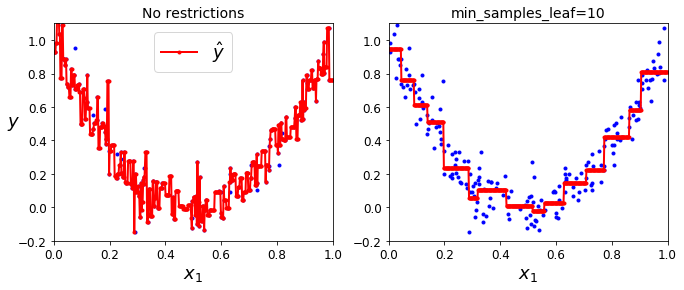

In [28]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

- CART 알고리즘은 훈련 세트를 불순도를 최소화하는 방향으로 분할하는 대신 평균제곱 오차를 최소화하도록 분할하는 것을 제외하고는 앞서 설명한 것과 거의 비슷하게 작동한다
- 분류에서와 같이 회귀 작업에서도 결정 트리가 과대적합되기 쉽다
- 규제가 없다면(즉, 기본 매개변수를 사용하면) 왼쪽과 같은 예측을 한다
- 이 그래프는 확실히 훈련세트에 아주 크게 과대적합되었다
- min_samples_leaf=10으로 지정하면 오른쪽 그래프처럼 훨씬 그럴싸한 모델을 만든다

### 정리

- 결정 트리는 이해하고 해석하기 쉬우며, 사용하기 편하며, 여러 용도로 사용할 수 있다
- 성능도 좋다
- 결정트리는 계단 모양의 결정 경계를 만든다
- 그래서 훈련 세트의 회전에 민감하다
- 이 문제를 해결하기 위해서 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법을 사용한다(8장)

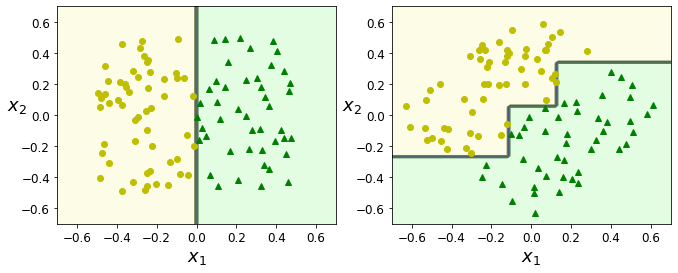

In [29]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

- 왼쪽의 결정 트리는 쉽게 데이터셋을 구분하지만
- 데이터셋을 45도 회전한 오른쪽의 결정 트리는 불필요하게 구불구불해졌다.
- 두 결정 트리 모두 훈련세트를 완벽하게 학습하지만 오른쪽 모델은 잘 일반화될 것 같지 않다 -> 8장의 PCA기법으로 해결